# PRACTICAL SESSION
## Exercises from Tuples and Files sessions


### Exercise 1

Modify function `make_syn_data` that you wrote for the programming lab ([exercises_1.ipynb]) so that it allows a variable number of parameters. Some parameters should be necessary: think about which ones should be variable.

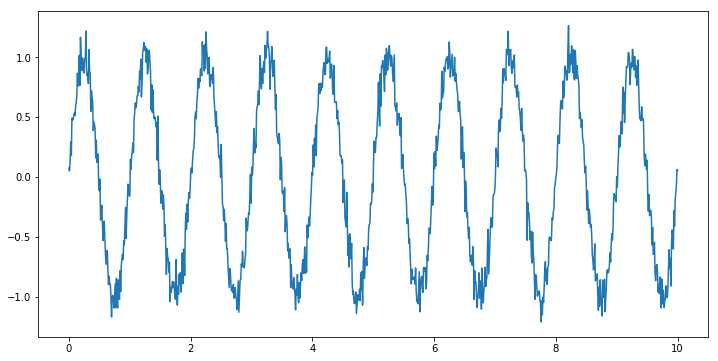

In [3]:
import matplotlib.pyplot as plt
import numpy as np
def make_linear_data(n, c=0, a=1, b=.1, start=0, stop=10):
    x = np.linspace(start, stop, n)
    eta = np.random.normal(loc=0, scale=1, size=len(x))
    y = c + a * x + b * eta
    return x, y

def make_sine_data(n, c=0, a=1, f=.1, b=.1, start=0, stop=10):
    x = np.linspace(start, stop, n)
    eta = np.random.normal(loc=0, scale=1, size=len(x))
    y = c + a * np.sin(np.pi * 2 * x * f) + b * eta
    return x, y

def make_dampedsine_data(n, c=0, a=1, f=.1, b=.1, start=0, stop=10):
    x = np.linspace(start, stop, n)
    eta = np.random.normal(loc=0, scale=1, size=len(x))
    y = c + a * np.exp(-x) * np.sin(np.pi * 2 * x * f) + b * eta
    return x, y

def make_syn_data(model, n, params, *args):
    """
    PARAMETERS:
        params: list of length 3 with c, a and b parameters of linear function
    """
    start, stop = args
    if model == 'linear':
        c, a, b = params
        x, y = make_linear_data(n, a=a, b=b, c=c, start=start, stop=stop)
    elif model == "sine":
        c, a, b, f = params
        x, y = make_sine_data(n, a=a, b=b, c=c, f=f, start=start, stop=stop)
    elif model == "damped":
        c, a, b, f = params
        x, y = make_dampedsine_data(n, a=a, b=b, c=c, f=f, start=start, stop=stop)
    else:
        raise ValueError('No model has been created under the name: ' + str(model))
    return x, y

x, y = make_syn_data('sine', 1000, [0, 1, 0.1 ,1], *(0,10))
plt.figure(figsize = (12,6))
plt.plot(x, y)
plt.show()

### Exercise 2

Write a function called `sum_mean` that takes any number of arguments and returns their sum and mean.

In [ ]:
def sum_mean(*args):
    """
    Function that takes any number of arguments (int or float).
    Returns the sum and mean of them. 
    If any argument is not int or float, it is not taken into account
    """
    # get list of all numbers
    nums = []
    for num in args:
        if type(num) == int or type(num) == float:
            nums.append(num)
    # sum 
    sum_nums = np.sum(nums)
    # mean
    mean_nums = np.mean(nums)
    return nums, sum_nums, mean_nums


nums, sum_nums, mean_nums = sum_mean(0,'arnau',2,3,4,5,'sdf','2')
print("The nums list is: " + str(nums))
print("The sum is: " + str(sum_nums))
print("The mean is: " + str(mean_nums))



### Exercise 3

1. Write a function that detects when a signal is `m` standard deviations higher than the average of the signal (you just need to modify the response detector you coded for the programming lab).
2. Generate simulated data with sinusoidal relationship (and some noise) and run the function with these data. Play with the parameters so that the function detects the top part of the sine. This is a very crude approximation of UP detection as done for slow wave activity in neural recordings.
3. Since we expect that the "UP" states are compact chunks of the signal the function should return a sequence of tuples with the starting and end index of each UP.
4. Write a function that given a sequence of UP states calculates the duration, mean activity and standard deviation of the activity for each UP state. Return a dictionary with all this information including the start and stop index of each UP.

Use `zip`, `enumerate` and all functionalities of tuples we have seen in this section that might be useful for this application.

dict_keys(['Up1', 'Up2', 'Up3', 'Up4', 'Up5', 'Up6', 'Up7', 'Up8', 'Up9', 'Up10'])
{'duration': 0.499, 'mean activity': 0.64, 'std activity': 0.31, 'start': 0, 'end': 499}


<IPython.core.display.Javascript object>


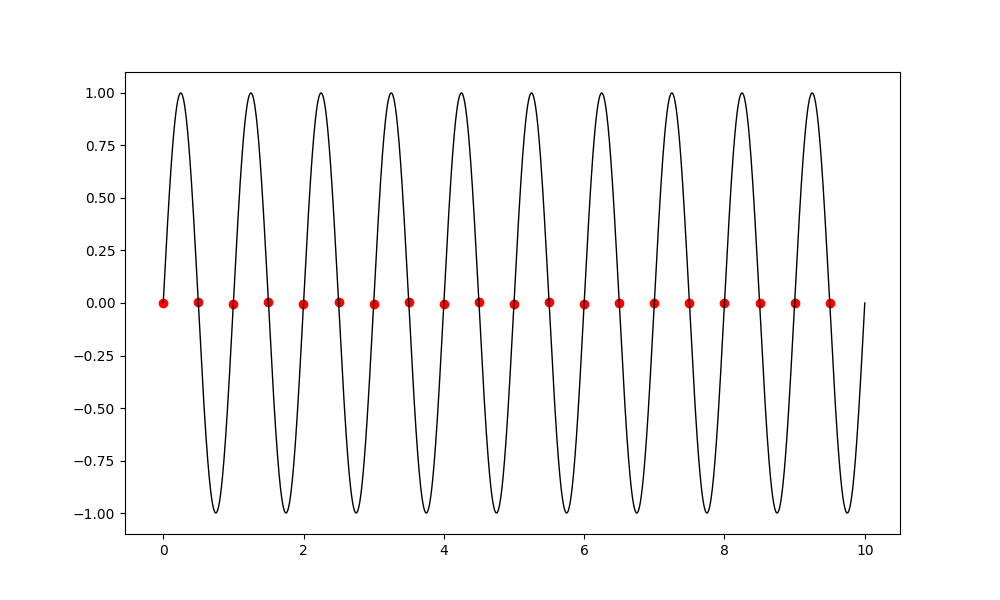

In [10]:
%matplotlib notebook
def UP_detection(RawSig, m = 2):
    """
    Function that detects when RawSig is m std higher than np.mean(RawSig)
    
    RETURN:
    - Sequence of tuples with start and end index of each up
    """
    mean_s = np.mean(RawSig)
    std_s = np.std(RawSig)
    
    # points above mean_s + m*std_s
    idxs = np.where(RawSig > mean_s + m*std_s)[0]
    if len(idxs) == 0:
        raise ValueError('m is too large so no UP has ben detected')
    boolean = RawSig > mean_s + m*std_s # boolean
    binary = boolean.astype(int) # binary
    
    # diff binary signal
    diff_bin = np.diff(binary)
    start_end = np.where((diff_bin == 1) | (diff_bin == -1))[0]
    
    # sequence of tuples
    seq = [] 
    for i in np.arange(0,len(start_end)-1,2):
        seq.append((start_end[i],start_end[i+1]))

    return seq


def compute_UP_metrics(Signal, seq, samp_freq):
    """
    Computes duration of each up, mean and std activity. 
    
    RETURNS:
        Dictionary
    """
    dict_global = {}
    for num, (start, end) in enumerate(seq):
        dur = (end-start)/samp_freq
        activity = Signal[start:end]
        mean_a = np.round(np.mean(activity),2)
        std_a = np.round(np.std(activity),2)
        up_dict = {'duration': dur, 'mean activity': mean_a, 'std activity': std_a, 'start':start, 'end':end}
        dict_global['Up'+str(num+1)] = up_dict 
    return dict_global
    
    

# sine data + noise
start, stop, n = 0, 10, 10000
samp_freq = n/(stop-start)

x, RawSig = make_syn_data('sine', n, [0, 1, 0 ,1], *(start,stop))

# compute ups 
ups = UP_detection(RawSig, m = 0)
dict_global = compute_UP_metrics(RawSig, ups, samp_freq)
print(dict_global.keys())
print(dict_global['Up1'])
ups = [item for t in ups for item in t] 

plt.figure(figsize = (10,6))
plt.plot(x, RawSig, c = 'k', lw = 1)
plt.scatter(x[ups], RawSig[ups], c = 'r')
plt.show()


    

## Exercises Files session

### Exercise 1

Imagine you just moved to a new lab, where they have done rodents experiments over the past 20 years. They want you to do a new analysis pooling data over all experiments done with mice (they also do rats), using the odd-ball task. 
Fortunately enough they have followed good practices of data storage and organization: all experiments are in a centralized folder and each experiment is in a subfolder, where, together with neural recordings, you find a metadata file in CSV format. All metadata files have a *species* and *task* column (plus several others). 

Write a function that takes a path as parameter (the centralized experiments folder) and returns a list of folder names that correspond to the experiments you are interested into.

Create a folder structure populated with few (let's say about 10) CSV files to simulate the scenario proposed by the exercise. Test your function.

**Solution**

Instead of creating manually the folders, subfolders and CSV files, here we are also doing it through code.

##### Creation of subfolders

In [ ]:
import os
folder_dir = '/Users/arnaumanasanchberengue/Desktop/NEURAL RECORDINGS'
num_exp = 10
# navigate to desired directory
os.chdir(folder_dir)
# create the subfolders 
for num in range(num_exp):
    os.mkdir('exp'+str(num+1))

##### Creation of CSV files inside each subfolder 
Random Species, Task and Age

In [ ]:
import random
import numpy as np
os.chdir(folder_dir)
subfolders = os.listdir()
subfolders = [f for f in os.listdir() if not f.startswith('.')] # those with mac, comment this and see what happens
species = ['Mus musculus', 'Rattus norvegicus']
tasks = ['odd-ball task', 'memory task']
header = "Species,Task,Age(yrs)\n"

for subf in subfolders:
    os.chdir(folder_dir + '/' + subf)
    fout = open(subf + '.csv', 'w')
    lines = str(random.choice(species)+','+random.choice(tasks)+','+str(np.random.randint(10)))
    fout.write(header + lines)
    fout.close()
    

##### Define the function 

In [ ]:
def find_experiments(path):
    # navigate to centralized folder
    os.chdir(path)
    # get list of subfolder
    subfolders = [f for f in os.listdir() if not f.startswith('.')]
    # create empty list that will contain those subfolders meeting the conditions
    subfolders_exp = []
    # read each csv and see if it corresponds to an experiment involving mice and odd ball task
    for subf in subfolders:
        os.chdir(path + '/' + subf)
        fin = open(subf + '.csv')
        # info
        for idx, line in enumerate(fin):
            if idx != 0:
                info = line.split(',')
        # find if species and task are the ones we are looking for
        if info[0] == 'Mus musculus' and info[1] == 'odd-ball task':
            subfolders_exp.append(subf)
    return subfolders_exp

subfolders_exp = find_experiments(folder_dir)
print(subfolders_exp)

### Exercise 2

Collect all functions you have written so far in a module. Remember to import all modules needed (numpy, etc.) in the your module. Write clear docstrings in case you haven't done so yet.
Try to import and use some function for your module.

### Exercise 3

Change your functions making use of list comprehension, generators, conditional expressions and gathering variables. Test your functions to be sure their output is still the same.